In [212]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1 Quick look at the data

In [213]:
# Read data
df = pd.read_csv('./data/laptop_price.csv', encoding='latin-1', usecols=lambda column: column != 'laptop_ID')
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### Shape of the data

In [214]:
df.shape

(1303, 12)

### Dataset Information

#### 1 Company- String -Laptop Manufacturer
#### 2 Product -String -Brand and Model
#### 3 TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)
#### 4 Inches -Numeric- Screen Size
#### 5 ScreenResolution -String- Screen Resolution
#### 6 Cpu- String -Central Processing Unit (CPU)
#### 7 Ram -String- Laptop RAM
#### 8 Memory -String- Hard Disk / SSD Memory
#### 9 GPU -String- Graphics Processing Units (GPU)
#### 10 OpSys -String- Operating System
#### 11 Weight -String- Laptop Weight
#### 12 Price_euros -Numeric- Price (Euro)

## 2. Perform data check

### 2.1 Check missing values

In [215]:
df.isna().sum()
# There is no missing values

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

### 2.2 Check duplicates values and datatypes

In [216]:
# check for duplicates
duplicates = df[df.duplicated()]

# print the number of duplicates
print('Number of duplicates:', len(duplicates))

Number of duplicates: 28


In [217]:
# check data types of each column
print('Data types of each column:')
print(df.dtypes)

Data types of each column:
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


### 2.3 Check unique values and stats

In [219]:
# check number of unique values of categorical column
for column in df.columns:
    if df[column].dtype == 'O':
        unique_values = df[column].nunique()
        print('Column', column, 'has', unique_values, 'unique values')

Column Company has 19 unique values
Column Product has 618 unique values
Column TypeName has 6 unique values
Column ScreenResolution has 40 unique values
Column Cpu has 118 unique values
Column Ram has 9 unique values
Column Memory has 39 unique values
Column Gpu has 110 unique values
Column OpSys has 9 unique values
Column Weight has 179 unique values


In [220]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['Inches', 'Price_euros']

We have 10 categorical features : ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']


In [221]:
df.describe()

,Inches,Price_euros
count,1303.000000,1303.000000
mean,15.017191,1123.686992
std,1.426304,699.009043
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1487.880000
max,18.400000,6099.000000


##### Insight
###### The price of laptop has a very high standard deviation -> the price varies a lot

## Feature engineering and visualization

##### Explore Company feature

In [222]:
# Try to highlight import info in this griupby
df.groupby('Company').agg(['min', 'max', 'median', 'mean', 'sum'])['Price_euros']



C:\Users\ultra\AppData\Local\Temp\ipykernel_1640\3336768437.py:2: FutureWarning: ['Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('Company').agg(['min', 'max', 'median', 'mean', 'sum'])['Price_euros']


,min,max,median,mean,sum
Company,,,,,
Acer,174.00,2599.00,559.00,626.775825,64557.91
Apple,898.94,2858.00,1339.69,1564.198571,32848.17
Asus,191.90,3975.00,1012.50,1104.169367,174458.76
Chuwi,244.99,449.00,248.90,314.296667,942.89
Dell,274.90,3659.40,985.00,1186.068990,352262.49
Fujitsu,649.00,799.00,739.00,729.000000,2187.00
Google,1275.00,2199.00,1559.00,1677.666667,5033.00
HP,209.00,4389.00,966.50,1067.774854,292570.31
Huawei,1349.00,1499.00,1424.00,1424.000000,2848.00


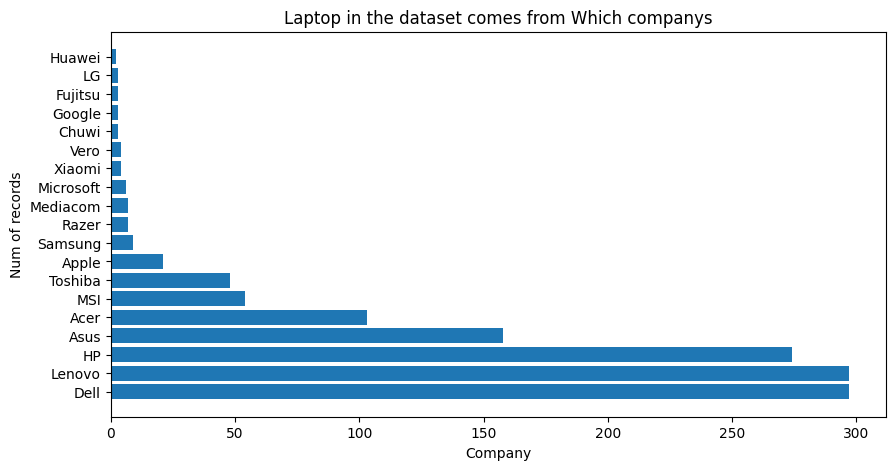

In [223]:
plt.figure(figsize=(10, 5))
# create bar chart
plt.barh(df['Company'].value_counts().index, df['Company'].value_counts())
# add labels and title
plt.xlabel('Company')
plt.ylabel('Num of records')
plt.title('Laptop in the dataset comes from Which companys')

# show the chart
plt.show()

##### Insight
###### Top 5 companies are Dell, Lenovo, HP, Asus, Acer

##### Explore TypeName and Inches features 

###### Because Inches and resolution are two different ways of measuring the size of a display, Products are so diverse and can be presnted by Comapny name instead, i'll frop inches and product cols

In [224]:
df.drop(columns=['Inches', 'Product'], inplace=True)

<Axes: xlabel='TypeName', ylabel='Price_euros'>

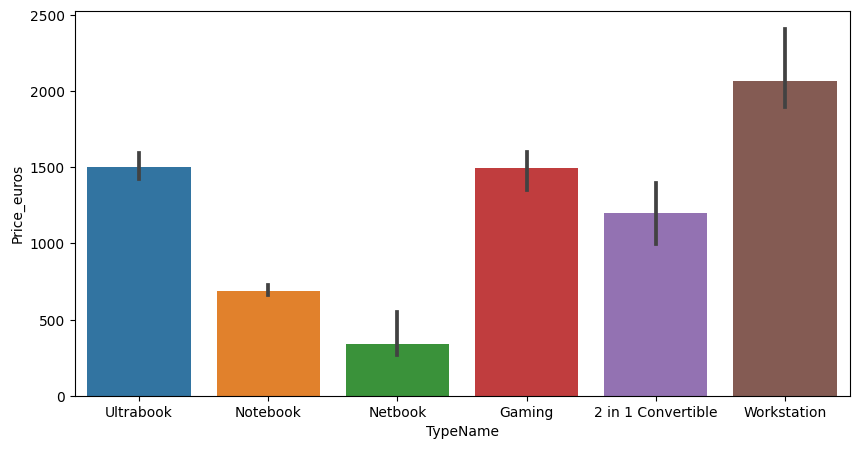

In [225]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x=df['TypeName'], y=df['Price_euros'], estimator=np.median)

##### Insight
###### TypeName can really help in prediction: workstationa and Gaming type of laptop have the highest median prices

##### Create a new features from ScreenResolution feature

In [226]:
df[['Width', 'Heigth']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)', expand=True)
df['Width'] = df['Width'].astype(np.int32)
df['Heigth'] = df['Heigth'].astype(np.int32)
# df['Total number of pixels'] = df['Width'] + df['Heigth']

In [227]:
print(df['Width'].isna().sum())
print(df['Heigth'].isna().sum())
# print(df['Total number of pixels'].isna().sum())

0
0


In [228]:
def line_plot(feature, graph_name, axs, col):
    plot_df = df.sort_values(by=feature, ascending=True)[[feature, 'Price_euros']]
    # create line plot
    sns.lineplot(x=plot_df[feature], y=plot_df['Price_euros'], ax=axs[col])

    # add labels and title
    axs[col].set_xlabel(feature)
    axs[col].set_ylabel('Price_euros')
    axs[col].set_title(graph_name)

        

In [229]:
# plot_df = df.sort_values(by='Width', ascending=True)[['Width', 'Price_euros']]
# sns.lineplot(x=plot_df['Width'], y=plot_df['Price_euros'])

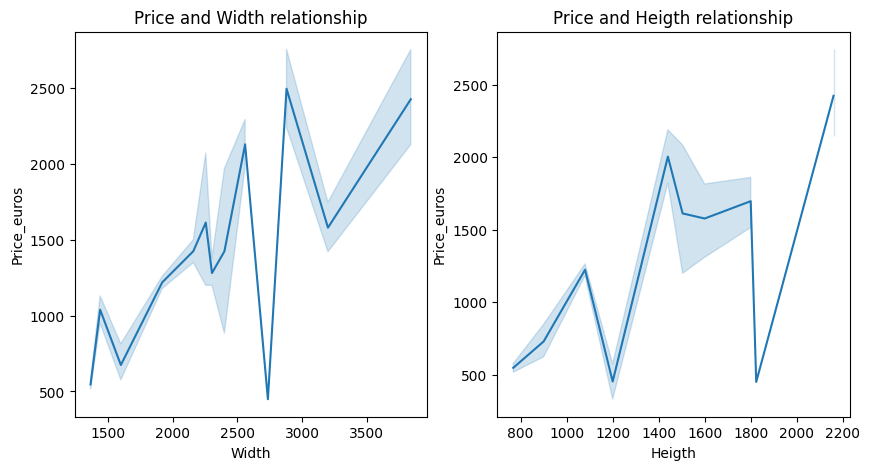

In [230]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# plt.subplot(121)
line_plot('Width', 'Price and Width relationship', axs, 0)
# plt.subplot(122)
line_plot('Heigth', 'Price and Heigth relationship', axs, 1)
# plt.subplot(211)
# line_plot('Total number of pixels', 'Price and Width relationship')
plt.show()


##### Insight
##### There is a certain positive correlation between width, heitgh and price

In [231]:
import re
df['IsTouchscreen'] = df['ScreenResolution'].str.contains('Touchscreen', flags=re.IGNORECASE)
df.loc[df['IsTouchscreen']==True, 'IsTouchscreen'] = 'Yes'
df.loc[df['IsTouchscreen']==False, 'IsTouchscreen'] = 'No'

<Axes: xlabel='IsTouchscreen', ylabel='Price_euros'>

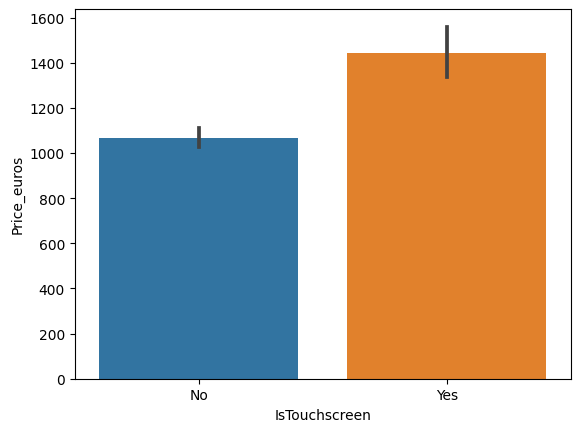

In [232]:
sns.barplot(data=df, x=df['IsTouchscreen'], y=df['Price_euros'], estimator=np.mean)

In [233]:
df['CpuProducer'] = df['Cpu'].str.extract(r'^(\w+)', expand=True)
df['CpuSpeed (GHz)'] = df['Cpu'].str.extract(r'(\d\.\d*|\d)GHz', expand=True)

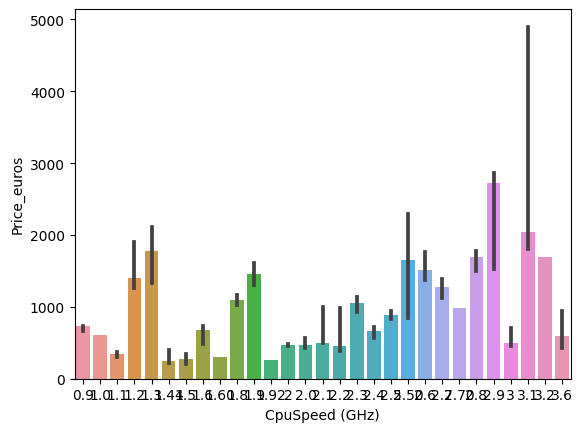

In [234]:
ordered_speed = df['CpuSpeed (GHz)'].sort_values().unique()
sns.barplot(data=df, x='CpuSpeed (GHz)', y='Price_euros', estimator='median', order=ordered_speed)
plt.show()

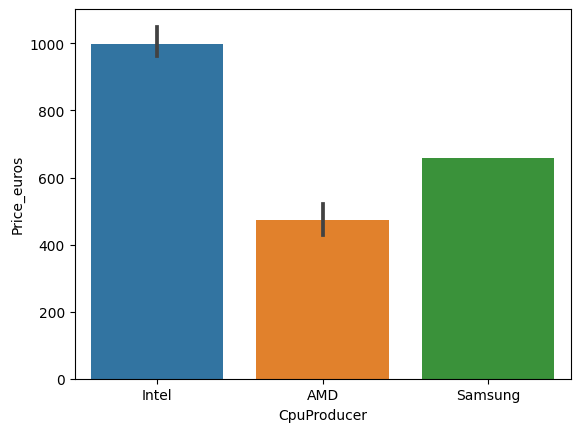

In [235]:
sns.barplot(data=df, x='CpuProducer', y='Price_euros', estimator='median')
plt.show()

In [236]:
# sns.barplot(data=df, x='Ram', y='Price_euros', estimator='median')
# plt.show()

In [237]:
df[['Memory1', 'Memory2']] = df['Memory'].str.split('+', expand=True)
df['Memory1'] = df['Memory1'].str.strip()
df['Memory2'] = df['Memory2'].str.strip()

In [238]:
df.loc[df['Memory2'].isnull(), 'Memory2'] = '0GB NoType'


In [239]:
df[['MemorySize1', 'MemoryType1']] = df['Memory1'].str.extract(r'(^\d+\.?\d*\w{2})\s(.+)', expand=True)
df['MemorySize1'] = df['MemorySize1'].str.strip()
df['MemoryType1'] = df['MemoryType1'].str.strip()
df[['MemorySize2', 'MemoryType2']] = df['Memory2'].str.extract(r'(^\d+\.?\d*\w{2})\s?(.+)', expand=True)
df['MemorySize2'] = df['MemorySize2'].str.strip()
df['MemoryType2'] = df['MemoryType2'].str.strip()

In [240]:
df['MemoryType'] = df['MemoryType1'].str.strip() + ', ' + df['MemoryType2'].str.strip()
# df['MemoryType'] = df.apply(lambda x: x['MemoryType1'] if x['MemoryType1'] == x['MemoryType2']\
#                             else x['MemoryType1'] + ', ' + x['MemoryType2'], axis=1)
df['MemoryType'] = df['MemoryType'].str.replace(', NoType', '')

In [241]:
df.drop(columns=['MemoryType1', 'MemoryType2'], inplace=True)

In [242]:
df['IsTB1'] = ~df['MemorySize1'].str.contains('TB')
df.loc[df['IsTB1']==False, 'IsTB1'] = 1024
df['IsTB2'] = ~df['MemorySize2'].str.contains('TB')
df.loc[df['IsTB2']==False, 'IsTB2'] = 1024


In [243]:
df['MemorySize1'] = df['MemorySize1'].str.extract(r'(\d+)').astype(np.int32)
df['MemorySize2'] = df['MemorySize2'].str.extract(r'(\d+)').astype(np.int32)
df['CombinedMemoryCapacity (GB)'] =  (df['MemorySize1'] * df['IsTB1']) +  (df['MemorySize2'] * df['IsTB2']) 

In [244]:
df[(df['MemorySize1']>0) & (df['MemorySize2']>0)]
df.drop(columns=['MemorySize1', 'MemorySize2', 'IsTB1', 'IsTB2', 'Memory1', 'Memory2'], inplace=True)

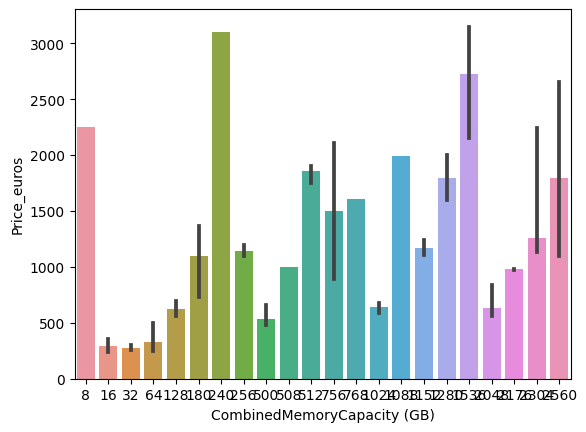

In [245]:
ordered = df['CombinedMemoryCapacity (GB)'].sort_values().unique()
sns.barplot(data=df, x='CombinedMemoryCapacity (GB)', y='Price_euros', estimator='median', order=ordered)
plt.show()

<Axes: xlabel='IsTouchscreen', ylabel='Price_euros'>

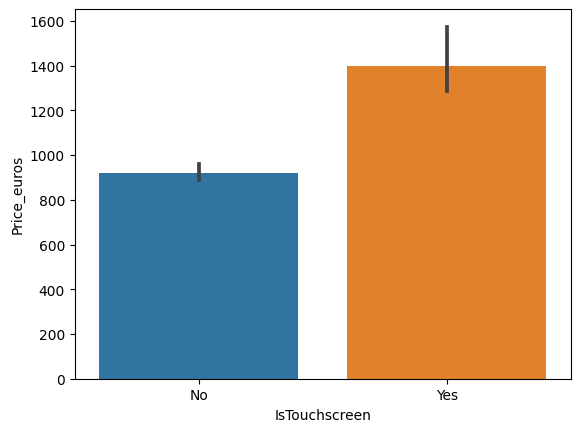

In [246]:
sns.barplot(data=df, x='IsTouchscreen', y='Price_euros', estimator='median')

In [247]:
df['GpuProducer'] = df['Gpu'].str.extract(r'(^\w+)')

In [248]:
df['GpuProducer'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [249]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

### Preparing Ram and Weight features

In [250]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

In [251]:
# drop 	ScreenResolution Cpu Memory Gpu	
df.drop(columns=['ScreenResolution', 'Cpu', 'Memory', 'Gpu'], inplace=True)

In [252]:
df.rename(columns={'Ram': 'Ram (GB)', 'Weight':'Weight (kg)'}, inplace=True)

In [253]:
# Define the new column order
new_order = [*df.columns[:5], *df.columns[6:], df.columns[5]]

# Use the reindex method to create a new DataFrame with the columns in the new order
new_df = df.reindex(columns=new_order)

### Convert variables into their correct type 

In [255]:
new_df['Ram (GB)'] = new_df['Ram (GB)'].astype(np.int16)
new_df['Weight (kg)'] = new_df['Weight (kg)'].astype(np.float16)
new_df['CpuSpeed (GHz)'] = new_df['CpuSpeed (GHz)'].astype(np.float16)
new_df['CombinedMemoryCapacity (GB)'] = new_df['CombinedMemoryCapacity (GB)'].astype(np.int32)

In [257]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Company                      1303 non-null   object 
 1   TypeName                     1303 non-null   object 
 2   Ram (GB)                     1303 non-null   int16  
 3   OpSys                        1303 non-null   object 
 4   Weight (kg)                  1303 non-null   float16
 5   Width                        1303 non-null   int32  
 6   Heigth                       1303 non-null   int32  
 7   IsTouchscreen                1303 non-null   object 
 8   CpuProducer                  1303 non-null   object 
 9   CpuSpeed (GHz)               1303 non-null   float16
 10  MemoryType                   1303 non-null   object 
 11  CombinedMemoryCapacity (GB)  1303 non-null   int32  
 12  GpuProducer                  1303 non-null   object 
 13  Price_euros       

In [260]:
new_df.to_csv('data/cleaned_data.csv', index=False)